# Labor in Agriculture

This is a project to gain insights from data on the employment in Agriculture worldwide. The data has the number of employees in the Agricultural sector in every country from 1990. It is adapted from [OWID](https://ourworldindata.org/employment-in-agriculture) and is alsosubmitted as the final project for [Jovian's Data Analysis course](https://jovian.com/learn/data-analysis-with-python-zero-to-pandas).

![Plot of labor in agriculture](https://drive.google.com/uc?export=view&id=1CVopb0KWSCTie0zaYgy_D3D5mT9ZcS6U "share-employed-in-agriculture")

### How to run the code

This is an executable [_Jupyter notebook_](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: _using free online resources_ (recommended) or _on your own computer_.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".

#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```

4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The dataset is uploaded on Google Drive and can be downloaded using `opendatasets`.

In [8]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.


In [1]:
# Change this
dataset_url = 'https://drive.google.com/file/d/1aAOcyzYw6MyhQh0X-0YrY_XkLULr1PlI/view?usp=sharing' 

In [2]:
import opendatasets as od
od.download(dataset_url)

279698it [00:00, 166072825.62it/s]

Downloaded to  .\number-of-people-employed-in-agriculture.csv


The dataset has been downloaded and extracted.


In [1]:
# Change this
data_dir = '.\\number-of-people-employed-in-agriculture.csv'

In [2]:
import os
os.listdir()

['environment-linux.yml',
 'environment-macos.yml',
 'environment.yml',
 'labor-in-agriculture.ipynb',
 'number-of-people-employed-in-agriculture.csv',
 'zerotopandas-course-project.ipynb']

Let us save and upload our work to Jovian before continuing.


In [3]:
project_name = "labor-in-agriculture.ipynb" # change this (use lowercase letters and hyphens only)

In [4]:
import jovian

<IPython.core.display.Javascript object>

In [5]:
jovian.commit(filename=project_name)

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/andrewkamaukim/labor-in-agriculture


'https://jovian.ai/andrewkamaukim/labor-in-agriculture'

## Data Preparation and Cleaning

Let's prepare and explore the data we have now, whilst merging with other datasets.


> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


In [6]:
import pandas as pd
import numpy as np

In [8]:
labour_population=pd.read_csv("number-of-people-employed-in-agriculture.csv")

In [10]:
labour_population

,Entity,Code,Year,number_employed_agri
0,Afghanistan,AFG,1991,2.092348e+06
1,Afghanistan,AFG,1992,2.296014e+06
2,Afghanistan,AFG,1993,2.542180e+06
3,Afghanistan,AFG,1994,2.750005e+06
4,Afghanistan,AFG,1995,2.918585e+06
...,...,...,...,...
7285,Zimbabwe,ZWE,2015,4.417798e+06
7286,Zimbabwe,ZWE,2016,4.471869e+06
7287,Zimbabwe,ZWE,2017,4.516303e+06
7288,Zimbabwe,ZWE,2018,4.561057e+06


The data has 7290 rows and 4 columns.

How many countries are included in the dataset?


In [18]:
entities=labour_population.Entity.unique()

In [ ]:
entities

In [21]:
np.size(entities)

235

The above are under the column 'Entity'. This includes regions such as 'Africa Eastern and Southern', which are not countries. For all the countries in the dataset, they have a corresponding 'Code'.


In [50]:
entity_codes=pd.DataFrame(labour_population.groupby(['Entity'])['Code'].count())

In [ ]:
entity_codes

We can see that some entities have no 'Code'. Let's find what these 'Entities' are.


In [126]:
# Find out where the entity has a code; the number of codes are not zero-> returns bools
notzero=np.array(entity_codes['Code']>0)
# An array of all the entities
allentities=np.array(entity_codes.index)
# Check where the bools returned are not false in the Entities
countries=allentities[notzero.nonzero()]

In [127]:
np.size(countries)

188

In [128]:
# remove 'World' from final version
countries=np.delete(countries,np.where(countries=="World"))
np.size(countries)

187

Removing the entities and create a new data frame without these


In [135]:
# find entities absent in countries
notcountries=list(set(allentities)-set(countries))
np.size(notcountries)

48

In [136]:
labour_pop2=labour_population[~labour_population.Entity.isin(notcountries)]

In [153]:
labour_pop2

,Entity,Code,Year,number_employed_agri
0,Afghanistan,AFG,1991,2.092348e+06
1,Afghanistan,AFG,1992,2.296014e+06
2,Afghanistan,AFG,1993,2.542180e+06
3,Afghanistan,AFG,1994,2.750005e+06
4,Afghanistan,AFG,1995,2.918585e+06
...,...,...,...,...
7285,Zimbabwe,ZWE,2015,4.417798e+06
7286,Zimbabwe,ZWE,2016,4.471869e+06
7287,Zimbabwe,ZWE,2017,4.516303e+06
7288,Zimbabwe,ZWE,2018,4.561057e+06


Merging another dataset with the share of population employed in agriculture


In [143]:
import opendatasets as od

In [145]:
dataset_url="https://drive.google.com/file/d/1D9zHO2x-6MwITWDcm3X2gcknFU8GWgSX/view?usp=sharing"
od.download(dataset_url)

223668it [00:00, 40152867.11it/s]

Downloaded to  .\share-of-the-labor-force-employed-in-agriculture.csv


In [146]:
labor_share=pd.read_csv("share-of-the-labor-force-employed-in-agriculture.csv")

In [155]:
labor_share

,Entity,Code,Year,share_employed_agri
0,Afghanistan,AFG,1991,63.430000
1,Afghanistan,AFG,1992,63.650002
2,Afghanistan,AFG,1993,64.410004
3,Afghanistan,AFG,1994,64.440002
4,Afghanistan,AFG,1995,64.300003
...,...,...,...,...
6844,Zimbabwe,ZWE,2015,67.059998
6845,Zimbabwe,ZWE,2016,66.879997
6846,Zimbabwe,ZWE,2017,66.480003
6847,Zimbabwe,ZWE,2018,66.019997


In [148]:
labor_share2=labor_share[~labor_share.Entity.isin(notcountries)]

In [ ]:
labor_share2

In [ ]:
labour_pop2

Remove years that don't appear in both


In [157]:
uncommon=list(set(labour_pop2.Year)-set(labor_share2.Year))
labour_pop2=labour_pop2[~labour_pop2.Year.isin(uncommon)]

In [161]:
uncommon=list(set(labor_share2.Year)-set(labour_pop2.Year))
labor_share2=labor_share2[~labor_share2.Year.isin(uncommon)]

In [172]:
labor_share2

,Entity,Code,Year,share_employed_agri
0,Afghanistan,AFG,1991,63.430000
1,Afghanistan,AFG,1992,63.650002
2,Afghanistan,AFG,1993,64.410004
3,Afghanistan,AFG,1994,64.440002
4,Afghanistan,AFG,1995,64.300003
...,...,...,...,...
6844,Zimbabwe,ZWE,2015,67.059998
6845,Zimbabwe,ZWE,2016,66.879997
6846,Zimbabwe,ZWE,2017,66.480003
6847,Zimbabwe,ZWE,2018,66.019997


In [180]:
alllabor=pd.merge(labour_pop2,labor_share2, on=['Entity','Code','Year'])

In [181]:
alllabor

,Entity,Code,Year,number_employed_agri,share_employed_agri
0,Afghanistan,AFG,1991,2.092348e+06,63.430000
1,Afghanistan,AFG,1992,2.296014e+06,63.650002
2,Afghanistan,AFG,1993,2.542180e+06,64.410004
3,Afghanistan,AFG,1994,2.750005e+06,64.440002
4,Afghanistan,AFG,1995,2.918585e+06,64.300003
...,...,...,...,...,...
5418,Zimbabwe,ZWE,2015,4.417798e+06,67.059998
5419,Zimbabwe,ZWE,2016,4.471869e+06,66.879997
5420,Zimbabwe,ZWE,2017,4.516303e+06,66.480003
5421,Zimbabwe,ZWE,2018,4.561057e+06,66.019997


In [182]:
jovian.commit(filename=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrewkamaukim/labor-in-agriculture" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/andrewkamaukim/labor-in-agriculture


'https://jovian.ai/andrewkamaukim/labor-in-agriculture'

## Exploratory Analysis and Visualization

Beginning of analysis and visualization

Let's begin by importing `matplotlib.pyplot` and `seaborn`.


In [184]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Exploring the column of share of employed farmers in the data set


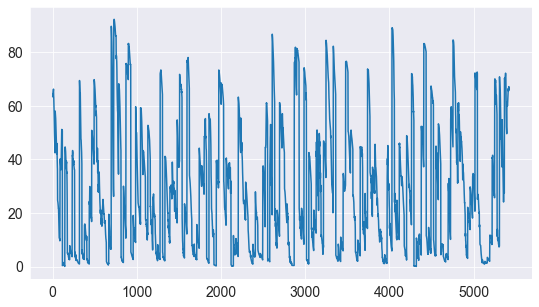

In [185]:
plt.plot(alllabor.share_employed_agri)

Getting the median from each country and exploring the share again


In [ ]:
median_shares=pd.DataFrame(alllabor.groupby(['Entity'])['share_employed_agri'].median())
median_shares

In [191]:
matplotlib.rcParams['figure.figsize'] = (15, 8)

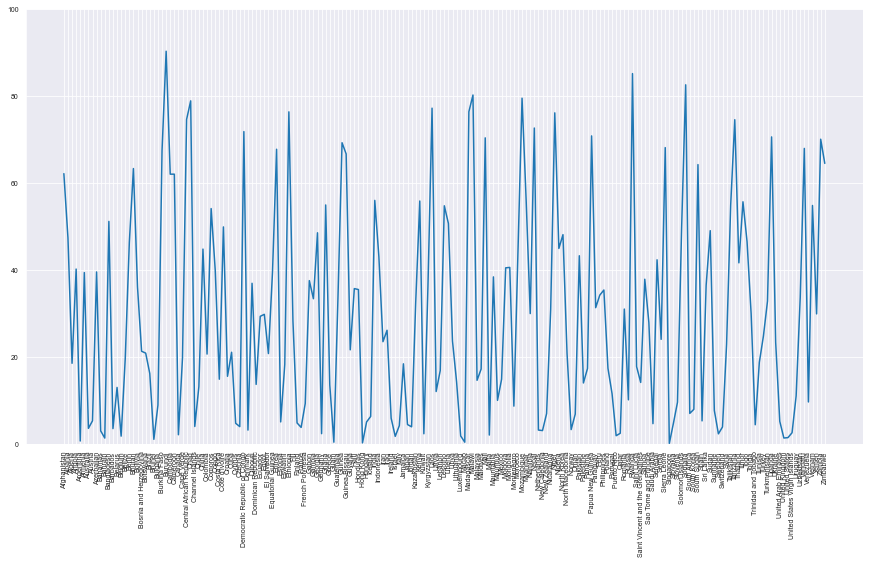

In [205]:
plt.plot(median_shares.share_employed_agri)
plt.xticks(rotation=90)
matplotlib.rcParams['font.size'] = 14
plt.ylim(0,100);

Exploring the share of farmers in specific countries


In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 8)

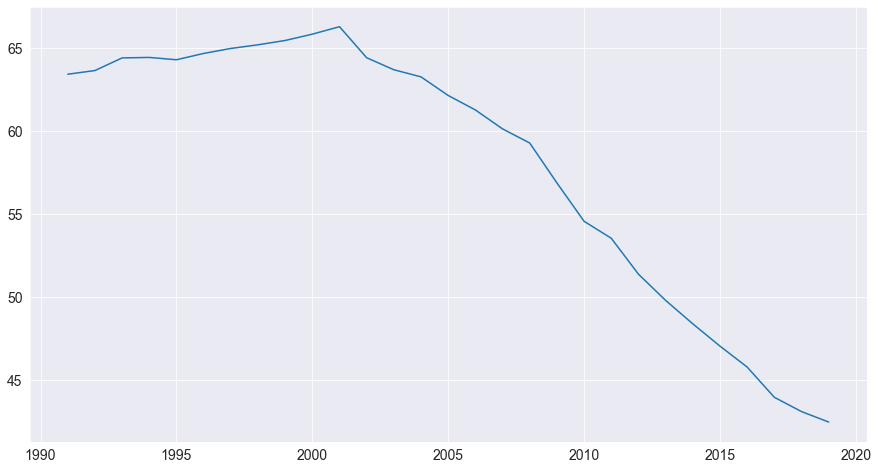

In [208]:
plt.plot(alllabor[alllabor.Entity=="Afghanistan"].Year,alllabor[alllabor.Entity=="Afghanistan"].share_employed_agri)

Create function to do the above


In [296]:
def plotcountry(countries):
    if type(countries)!=str:
     for country in countries:
      plt.plot(alllabor[alllabor.Entity==country].Year,alllabor[alllabor.Entity==country].share_employed_agri)
    else:
      plt.plot(alllabor[alllabor.Entity==countries].Year,alllabor[alllabor.Entity==countries].share_employed_agri)
    plt.legend(countries);  
    

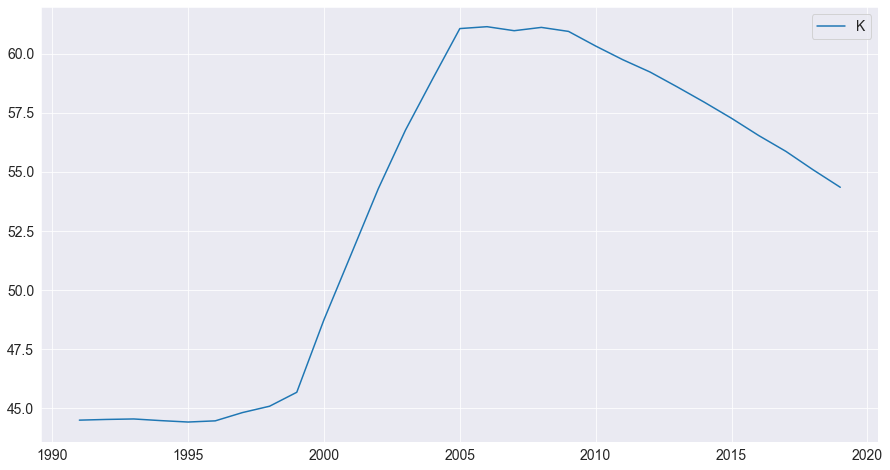

In [297]:
plotcountry("Kenya")

Plotting per year for different countries


In [ ]:
alllabor[alllabor.Year==2000]

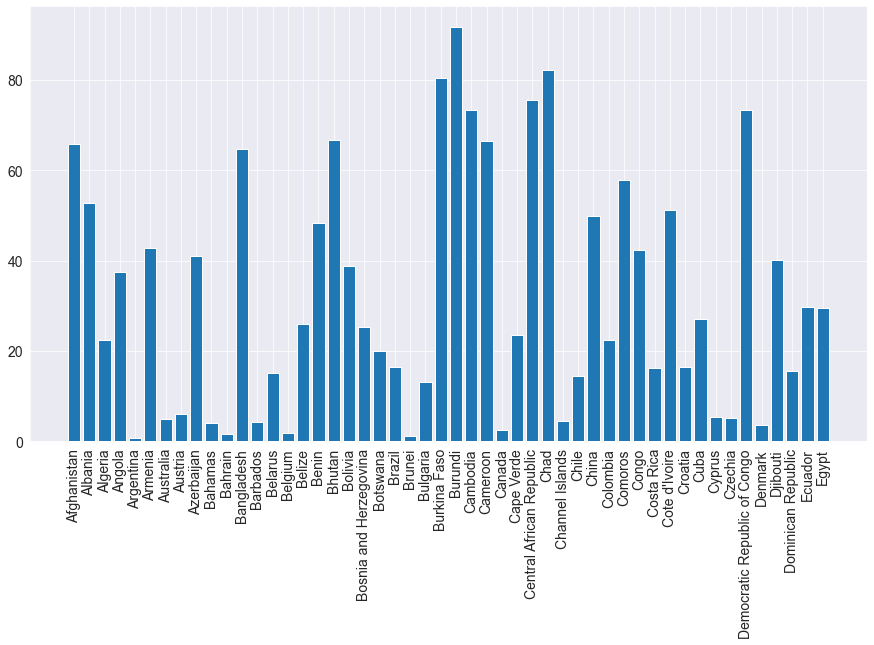

In [230]:
# plotting for the first 50 countries in the year 2000
plt.bar((alllabor[alllabor.Year==2000].Entity)[:50],alllabor[alllabor.Year==2000].share_employed_agri[:50])
plt.xticks(rotation=90);

In [322]:
def plotyear(year, countries):
    plt.bar((alllabor[alllabor.Year==year][alllabor.Entity.isin(countries)].Entity), height=(alllabor[alllabor.Year==year][alllabor.Entity.isin(countries)].share_employed_agri))
    plt.xticks(rotation=90);

Let's plot for East Africa

In [324]:
East_Africa=["Kenya","Uganda","Tanzania","Rwanda","Burundi"]

C:\Users\swift\AppData\Local\Temp\ipykernel_21416\950247979.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar((alllabor[alllabor.Year==year][alllabor.Entity.isin(countries)].Entity), height=(alllabor[alllabor.Year==year][alllabor.Entity.isin(countries)].share_employed_agri))


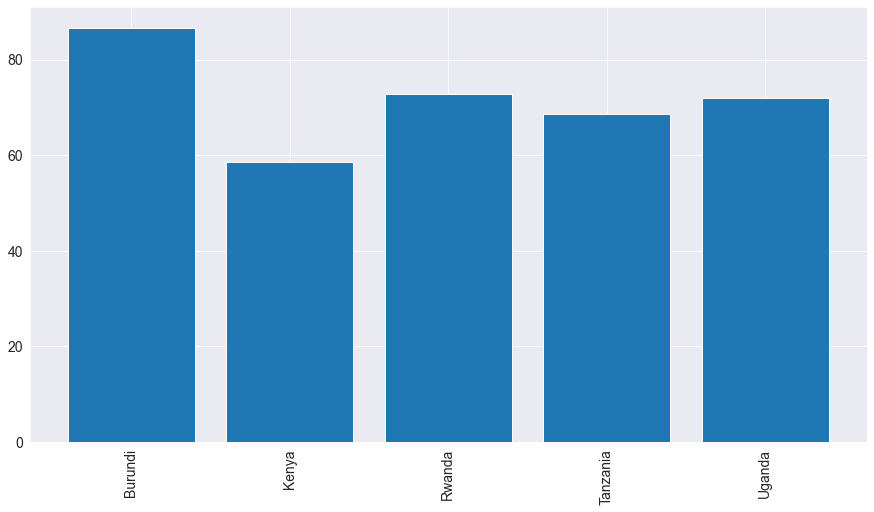

In [326]:
plotyear(2013,East_Africa)

Adding a dataset that contains the names of African countries as per our data


In [250]:
dataset_url='https://drive.google.com/file/d/1SlOTlBiDoAzk9-5kKfln8f08wBXt3tuf/view?usp=sharing'
od.download(dataset_url)

448802it [00:00, 104173327.27it/s]

Downloaded to  .\value-added-in-the-agricultural-sector-as-of-gdp-vs-gdp-per-capita.csv


In [251]:
valueadded=pd.read_csv('value-added-in-the-agricultural-sector-as-of-gdp-vs-gdp-per-capita.csv')

In [262]:
continents=pd.DataFrame(valueadded.groupby(['Continent']).Entity.unique())

In [263]:
continents

,Entity
Continent,
Africa,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."
Antarctica,"[Antarctica, Bouvet Island, French Southern Te..."
Asia,"[Abkhazia, Afghanistan, Akrotiri and Dhekelia,..."
Europe,"[Albania, Andorra, Austria, Austria-Hungary, B..."
North America,"[Anguilla, Antigua and Barbuda, Aruba, Bahamas..."
Oceania,"[American Samoa, Australia, Cook Islands, Fiji..."
South America,"[Argentina, Bolivia, Brazil, Chile, Colombia, ..."


In [265]:
continents.T

Continent,Africa,Antarctica,Asia,Europe,North America,Oceania,South America
Entity,"[Algeria, Angola, Benin, Botswana, Burkina Fas...","[Antarctica, Bouvet Island, French Southern Te...","[Abkhazia, Afghanistan, Akrotiri and Dhekelia,...","[Albania, Andorra, Austria, Austria-Hungary, B...","[Anguilla, Antigua and Barbuda, Aruba, Bahamas...","[American Samoa, Australia, Cook Islands, Fiji...","[Argentina, Bolivia, Brazil, Chile, Colombia, ..."


In [270]:
np.size(continents.Entity.Africa)

61

In [ ]:
list(continents.Entity.Africa)

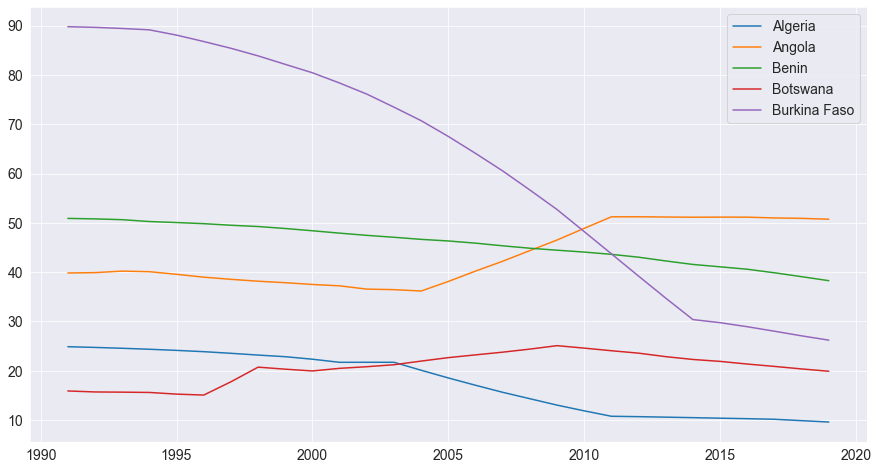

In [292]:
plotcountry(list(continents.Entity.Africa[:5]))

C:\Users\swift\AppData\Local\Temp\ipykernel_21416\950247979.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar((alllabor[alllabor.Year==year][alllabor.Entity.isin(countries)].Entity), height=(alllabor[alllabor.Year==year][alllabor.Entity.isin(countries)].share_employed_agri))


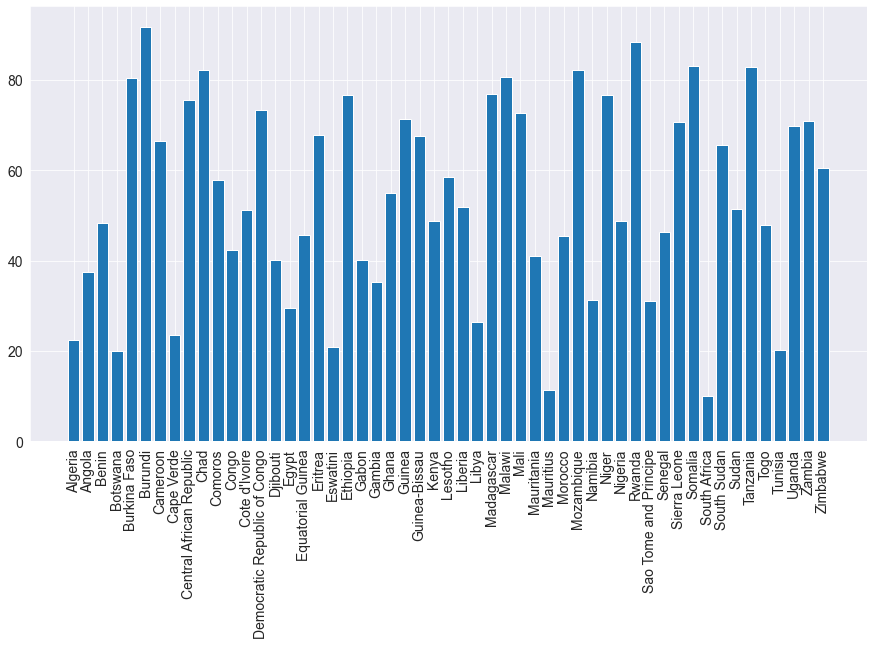

In [330]:
plotyear(2000,list(continents.Entity.Africa));

In [332]:
addinggdp=pd.merge(alllabor,valueadded,on=['Entity','Code','Year'])

In [333]:
addinggdp

,Entity,Code,Year,number_employed_agri,share_employed_agri,"Agriculture, forestry, and fishing, value added (% of GDP)","GDP per capita, PPP (constant 2017 international $)",Continent
0,Afghanistan,AFG,2002,3.590422e+06,64.419998,38.627892,1189.784668,NaN
1,Afghanistan,AFG,2003,3.749960e+06,63.700001,37.418854,1235.810059,NaN
2,Afghanistan,AFG,2004,3.921700e+06,63.270000,29.721067,1200.277954,NaN
3,Afghanistan,AFG,2005,4.029470e+06,62.150002,31.114855,1286.793701,NaN
4,Afghanistan,AFG,2006,4.071664e+06,61.279999,28.635969,1315.789062,NaN
...,...,...,...,...,...,...,...,...
5092,Zimbabwe,ZWE,2015,4.417798e+06,67.059998,8.284246,3707.622559,Africa
5093,Zimbabwe,ZWE,2016,4.471869e+06,66.879997,7.873986,3678.217041,NaN
5094,Zimbabwe,ZWE,2017,4.516303e+06,66.480003,8.340969,3795.642334,NaN
5095,Zimbabwe,ZWE,2018,4.561057e+06,66.019997,10.520955,3923.030518,NaN


In [329]:
jovian.commit(filename=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrewkamaukim/labor-in-agriculture" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/andrewkamaukim/labor-in-agriculture


'https://jovian.ai/andrewkamaukim/labor-in-agriculture'

## Asking and Answering Questions

Let's now draw insights from our data


#### Q1: How many people are employed in agriculture, in high income countries, vs low income countries?


One question we might like to answer is the difference in employment levels in agriculture in the four levels of income as per the world bank; low income, lower middle income, upper middle income, and high income.

In [448]:
# the datasets we downloaded have categorized these sub-groups already
labor_share[labor_share.Entity=='Low income'].tail(10)

,Entity,Code,Year,share_employed_agri
3659,Low income,NaN,2010,64.806491
3660,Low income,NaN,2011,64.102479
3661,Low income,NaN,2012,63.329646
3662,Low income,NaN,2013,62.967081
3663,Low income,NaN,2014,62.284491
3664,Low income,NaN,2015,61.657461
3665,Low income,NaN,2016,61.262237
3666,Low income,NaN,2017,60.763621
3667,Low income,NaN,2018,60.308733
3668,Low income,NaN,2019,59.803983


In [450]:
labor_share[labor_share.Entity=='Upper middle income'].tail(5)

,Entity,Code,Year,share_employed_agri
6583,Upper middle income,NaN,2015,23.469740
6584,Upper middle income,NaN,2016,22.794712
6585,Upper middle income,NaN,2017,22.230692
6586,Upper middle income,NaN,2018,21.563713
6587,Upper middle income,NaN,2019,20.946907


From the above, we can see that the data runs to 2019. We will use 2019 for all the categories.

In [442]:
low_income=float(labor_share[labor_share.Entity=='Low income'][labor_share.Year==2019].share_employed_agri)
lower_middle=float(labor_share[labor_share.Entity=='Lower middle income'][labor_share.Year==2019].share_employed_agri)
upper_middle=float(labor_share[labor_share.Entity=='Upper middle income'][labor_share.Year==2019].share_employed_agri)
high_income=float(labor_share[labor_share.Entity=='High income'][labor_share.Year==2019].share_employed_agri)


C:\Users\swift\AppData\Local\Temp\ipykernel_21416\3057731295.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  low_income=float(labor_share[labor_share.Entity=='Low income'][labor_share.Year==2019].share_employed_agri)
C:\Users\swift\AppData\Local\Temp\ipykernel_21416\3057731295.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lower_middle=float(labor_share[labor_share.Entity=='Lower middle income'][labor_share.Year==2019].share_employed_agri)
C:\Users\swift\AppData\Local\Temp\ipykernel_21416\3057731295.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  upper_middle=float(labor_share[labor_share.Entity=='Upper middle income'][labor_share.Year==2019].share_employed_agri)
C:\Users\swift\AppData\Local\Temp\ipykernel_21416\3057731295.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_income=float(labor_share[labor_share.Entity=='High income'][labor_sha

Let us now plot the above on a bar plot.

In [454]:
income_names=['Low income','Lower middle','Upper middle','High income']
income_classes=[low_income,lower_middle,upper_middle,high_income]

Text(0.5, 1.0, '2019 share of employment in agri')

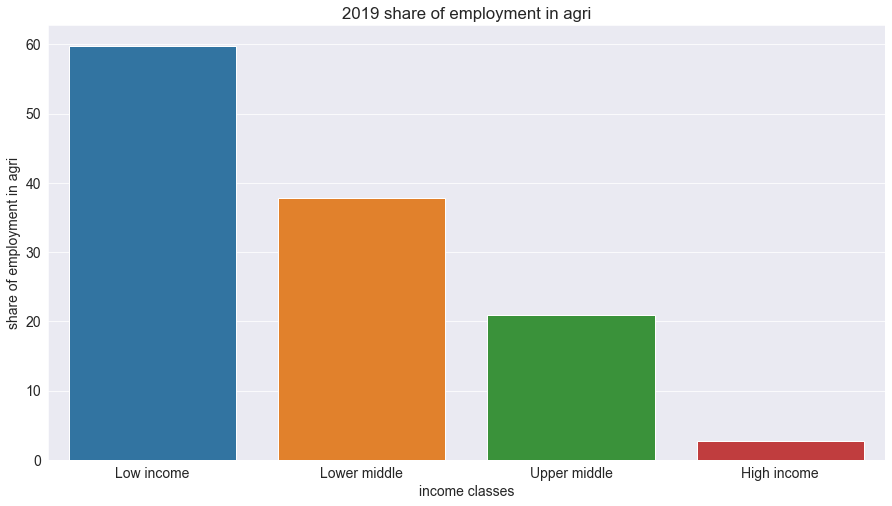

In [455]:
sns.barplot(x=income_names,y=income_classes,data=labor_share)
plt.xlabel('income classes')
plt.ylabel('share of employment in agri')
plt.title('2019 share of employment in agri')

From the above, we can see that a large share of people in low-income countries are employed in agriculture, while the trend reduces from lower-middle to high income. 

This might imply that in high income countries, employment might be low due to reliance on other industries, and maybe, mechanization of the agricultural sector.

### Q2: What is the share of farmers per continent?

Can we find whether there's is a difference in the share of people that are farmers per continent?

In [456]:
addinggdp

,Entity,Code,Year,number_employed_agri,share_employed_agri,"Agriculture, forestry, and fishing, value added (% of GDP)","GDP per capita, PPP (constant 2017 international $)",Continent
0,Afghanistan,AFG,2002,3.590422e+06,64.419998,38.627892,1189.784668,NaN
1,Afghanistan,AFG,2003,3.749960e+06,63.700001,37.418854,1235.810059,NaN
2,Afghanistan,AFG,2004,3.921700e+06,63.270000,29.721067,1200.277954,NaN
3,Afghanistan,AFG,2005,4.029470e+06,62.150002,31.114855,1286.793701,NaN
4,Afghanistan,AFG,2006,4.071664e+06,61.279999,28.635969,1315.789062,NaN
...,...,...,...,...,...,...,...,...
5092,Zimbabwe,ZWE,2015,4.417798e+06,67.059998,8.284246,3707.622559,Africa
5093,Zimbabwe,ZWE,2016,4.471869e+06,66.879997,7.873986,3678.217041,NaN
5094,Zimbabwe,ZWE,2017,4.516303e+06,66.480003,8.340969,3795.642334,NaN
5095,Zimbabwe,ZWE,2018,4.561057e+06,66.019997,10.520955,3923.030518,NaN


In [487]:
addinggdp.groupby(['Continent'])['share_employed_agri'].median()

Continent
Africa           43.500000
Asia             27.580000
Europe            4.530000
North America    12.310000
Oceania          19.879999
South America    13.105000
Name: share_employed_agri, dtype: float64

In [488]:
continents=addinggdp.groupby(['Continent'])['share_employed_agri'].median().index

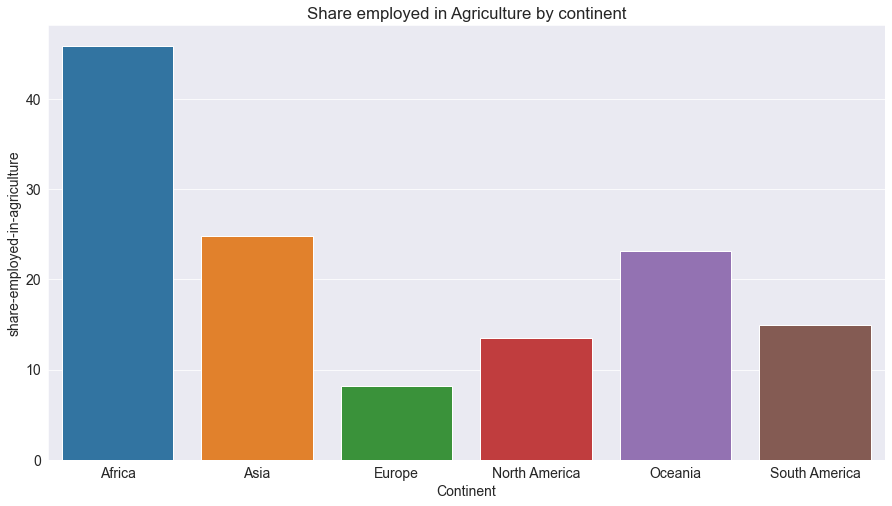

In [489]:
sns.barplot(x=continents,y=addinggdp.groupby(['Continent'])['share_employed_agri'].mean())
plt.title('Share employed in Agriculture by continent')
plt.xlabel('Continent')
plt.ylabel('share-employed-in-agriculture');

From the above, we can see that the continent of Africa has the highest employment in agriculture while Europe has the lowest share of employment in agriculture. 

This may be attributed to the difference in levels of development in the two continents. Whilst Europe is highly developed, and many people might earn a living from industries in the developed sector, Africa's economy might heavily rely on agriculture.

### Q3: What is the relationship between GDP per Capita and share of people employed in agriculture?

In [501]:
gdpsort=addinggdp[addinggdp.Year==2015].sort_values(by=['GDP per capita, PPP (constant 2017 international $)'])
gdpsort

,Entity,Code,Year,number_employed_agri,share_employed_agri,"Agriculture, forestry, and fishing, value added (% of GDP)","GDP per capita, PPP (constant 2017 international $)",Continent
735,Burundi,BDI,2015,3.753656e+06,86.290001,30.680830,825.205688,Africa
872,Central African Republic,CAF,2015,1.289226e+06,71.830002,31.527382,852.749207,Africa
4164,Somalia,SOM,2015,2.795771e+06,81.019997,NaN,1026.038208,Africa
1246,Democratic Republic of Congo,COD,2015,1.728436e+07,66.150002,18.370388,1065.242432,Africa
3317,Niger,NER,2015,5.330353e+06,73.769997,32.416996,1131.519165,Africa
...,...,...,...,...,...,...,...,...
4234,South Sudan,SSD,2015,2.766246e+06,61.790001,10.355027,NaN,Africa
4437,Syria,SYR,2015,6.494271e+05,12.270000,33.488735,NaN,Asia
4868,United States Virgin Islands,VIR,2015,1.119613e+03,2.130000,NaN,NaN,North America
4980,Venezuela,VEN,2015,9.928498e+05,7.330000,NaN,NaN,South America


In [502]:
gdpsort=gdpsort.dropna(subset='GDP per capita, PPP (constant 2017 international $)')

In [503]:
gdpsort

,Entity,Code,Year,number_employed_agri,share_employed_agri,"Agriculture, forestry, and fishing, value added (% of GDP)","GDP per capita, PPP (constant 2017 international $)",Continent
735,Burundi,BDI,2015,3.753656e+06,86.290001,30.680830,825.205688,Africa
872,Central African Republic,CAF,2015,1.289226e+06,71.830002,31.527382,852.749207,Africa
4164,Somalia,SOM,2015,2.795771e+06,81.019997,NaN,1026.038208,Africa
1246,Democratic Republic of Congo,COD,2015,1.728436e+07,66.150002,18.370388,1065.242432,Africa
3317,Niger,NER,2015,5.330353e+06,73.769997,32.416996,1131.519165,Africa
...,...,...,...,...,...,...,...,...
2205,Ireland,IRL,2015,1.219169e+05,5.340000,0.896200,71508.734375,Europe
4075,Singapore,SGP,2015,2.761443e+03,0.080000,0.032614,89519.734375,Asia
3741,Qatar,QAT,2015,2.401316e+04,1.230000,0.161318,95965.250000,Asia
2665,Luxembourg,LUX,2015,2.968780e+03,1.050000,0.223733,113182.726562,Europe


Text(0, 0.5, 'gdp-per-capita')

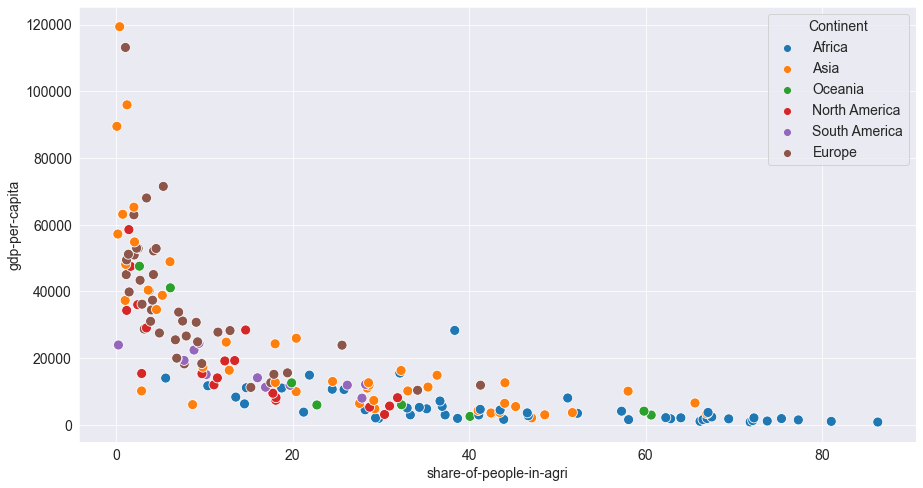

In [510]:
sns.scatterplot(x=gdpsort.share_employed_agri,y=gdpsort['GDP per capita, PPP (constant 2017 international $)'],hue=gdpsort.Continent,s=100)
plt.xlabel('share-of-people-in-agri')
plt.ylabel('gdp-per-capita')

From the above plot, we can see that countries with the lowest gdp have the highest number of people employed in agriculture. The opposite is also true, where the countries with the highest gdp have the lowest number of people employed in Agriculture. 

This finding strengthens what we've stated above, where the high income countries and highly developed nations have a lower number of people employed in Agriculture. It also asserts our finding in the prior question, where the economy of African countries has a heavy reliance on agriculture, whose output is not as high as those for industrialized nations.

### Q4: What has the trend been for low, lower-middle, upper-middle, and high income countries?

In [516]:
trendclasses=labor_share[labor_share.Entity.isin(['Low income','Lower middle income','Upper middle income','High income'])]

In [517]:
trendclasses

,Entity,Code,Year,share_employed_agri
2559,High income,NaN,1991,6.435590
2560,High income,NaN,1992,6.270380
2561,High income,NaN,1993,5.997853
2562,High income,NaN,1994,5.781525
2563,High income,NaN,1995,5.554790
...,...,...,...,...
6583,Upper middle income,NaN,2015,23.469740
6584,Upper middle income,NaN,2016,22.794712
6585,Upper middle income,NaN,2017,22.230692
6586,Upper middle income,NaN,2018,21.563713


In [528]:
highe=trendclasses[trendclasses.Entity=='High income'].share_employed_agri
higheyears=trendclasses[trendclasses.Entity=='High income'].Year
lowe=trendclasses[trendclasses.Entity=='Low income'].share_employed_agri
lowey=trendclasses[trendclasses.Entity=='Low income'].Year
lowerm=trendclasses[trendclasses.Entity=='Lower middle income'].share_employed_agri
lowermy=trendclasses[trendclasses.Entity=='Lower middle income'].Year
upperm=trendclasses[trendclasses.Entity=='Upper middle income'].share_employed_agri
uppermy=trendclasses[trendclasses.Entity=='Upper middle income'].Year

In [ ]:
highe

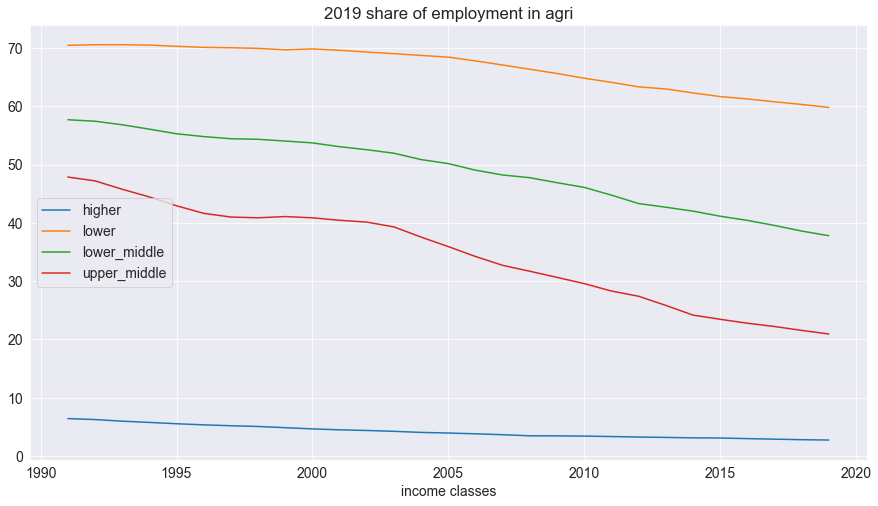

In [539]:
plt.plot(higheyears,highe)
plt.plot(lowey,lowe)
plt.plot(lowermy,lowerm)
plt.plot(uppermy,upperm)
plt.xlabel('income classes')
plt.title('2019 share of employment in agri')
plt.legend(['higher','lower','lower_middle','upper_middle'])

From the above, we can see that over the years, the trend for number of people employed in all countries has reduced. This may mainly be b=due to machanization and improving efficiency in the farm. Also, due to crop up of many other industries, the labor force may be shifting to other areas. We also see that the countries in the upper middle have a steeper decline. This may be due to faster growing economies, or shifting reliance on agriculture. 

### Q5: How do different African countries compare in employment in Agriculture?

In [541]:
valueadded=pd.read_csv('value-added-in-the-agricultural-sector-as-of-gdp-vs-gdp-per-capita.csv')
continents=pd.DataFrame(valueadded.groupby(['Continent']).Entity.unique())
continents.T

Continent,Africa,Antarctica,Asia,Europe,North America,Oceania,South America
Entity,"[Algeria, Angola, Benin, Botswana, Burkina Fas...","[Antarctica, Bouvet Island, French Southern Te...","[Abkhazia, Afghanistan, Akrotiri and Dhekelia,...","[Albania, Andorra, Austria, Austria-Hungary, B...","[Anguilla, Antigua and Barbuda, Aruba, Bahamas...","[American Samoa, Australia, Cook Islands, Fiji...","[Argentina, Bolivia, Brazil, Chile, Colombia, ..."


C:\Users\swift\AppData\Local\Temp\ipykernel_21416\950247979.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar((alllabor[alllabor.Year==year][alllabor.Entity.isin(countries)].Entity), height=(alllabor[alllabor.Year==year][alllabor.Entity.isin(countries)].share_employed_agri))


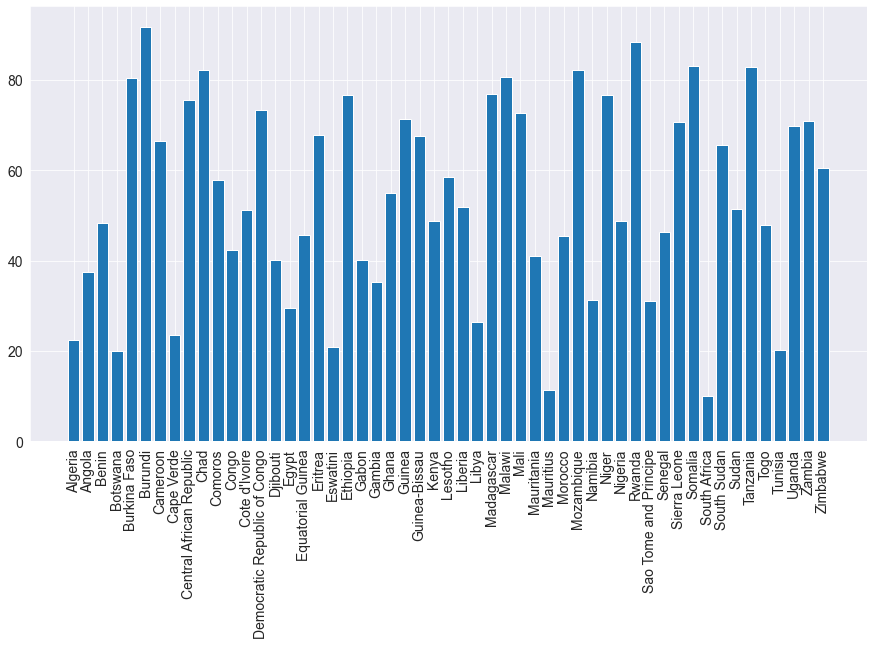

In [542]:
plotyear(2000,list(continents.Entity.Africa));

The above shows the different employment shares in African countries. Whilst some countries have high employment in agriculture, some countries such as South Africa have low employment shares in agriculture, since their economy also relies on other sectors such as mining and tourism. Most countries that low a high employment share in agriculture have other sources of revenue for their economy, which at most times, generates higher revenue than agriculture.

In [543]:
import jovian

In [545]:
jovian.commit(filename=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrewkamaukim/labor-in-agriculture" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/andrewkamaukim/labor-in-agriculture


'https://jovian.ai/andrewkamaukim/labor-in-agriculture'

## Inferences and Conclusion

From our analysis, we can conclude that 
1. Low income countries have the highest share of people working in the agricuktural sector. This is because in people in higher income countries don't rely on the agricultural sector as a major source of revenue, while low income countries have this as their major source of revenue.
2. African countries have the largest share of labor in agrivulture, while Europe has the least. This is attributed to most countries in Europe being developed, hence relying on other sources of revenue and mechanization in their agriculture, while many African countries mainly rely on agriculture, and rely on manpower as opposed to technology for their agriculture.
3. Countries with lower GDP Per Capita have a higher labor force in agriculture.
4. The trend for number of people employed in agriculture is generally reducing, due to technological advancements, and shifting reliance to other sectors of the economy for output.

In [30]:
import jovian

In [546]:
jovian.commit(filename=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrewkamaukim/labor-in-agriculture" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/andrewkamaukim/labor-in-agriculture


'https://jovian.ai/andrewkamaukim/labor-in-agriculture'

## References and Future Work

Main reference: [OWID](https://ourworldindata.org/employment-in-agriculture)
[Data Sources](https://drive.google.com/drive/folders/1FUO5ax379wvYwgtDR5pBxmHCNEWf2rld?usp=share_link)

Future Work:
Analysing the contribution of agriculture to the economy of various countries

In [32]:
import jovian

In [549]:
jovian.commit(filename=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrewkamaukim/labor-in-agriculture" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/andrewkamaukim/labor-in-agriculture


'https://jovian.ai/andrewkamaukim/labor-in-agriculture'